In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install required packages
import numpy as np
import pandas as pd
from plotnine import *
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#read csv files
df = pd.read_csv("/content/drive/My Drive/WORK/SI_Budget_Report/Datasets/neighborhood_cord_Budget.csv")
censusdf = pd.read_csv("/content/drive/My Drive/WORK/SI_Budget_Report/Datasets/N.Census-Budget.csv")

# Geography Spending

In [ ]:
# Exclude "Citywide" and "Multiple Neighborhoods" rows
filtered_df = df[~df['Neighborhood'].isin(['Citywide', 'Multiple Neighborhoods'])]

# Group by Neighborhood and calculate sum of Total_Project_Budget
grouped_df = filtered_df.groupby('Neighborhood')['Total_Project_Budget'].sum().reset_index()

# Calculate the total sum of Total_Project_Budget
total_budget = grouped_df['Total_Project_Budget'].sum()

# Calculate the percentage of the total budget for each neighborhood
grouped_df['Percentage'] = (grouped_df['Total_Project_Budget'] / total_budget) * 100

# Sort the DataFrame by Total_Project_Budget in descending order
sorted_df = grouped_df.sort_values(by='Total_Project_Budget', ascending=False)

# Print the result
print(sorted_df)

                  Neighborhood  Total_Project_Budget  Percentage
4                  Charlestown             531212390   18.848537
7   Downtown/Government Center             318415000   11.298036
5                    Chinatown             271272172    9.625309
6                   Dorchester             239411239    8.494816
17                     Roxbury             237308325    8.420200
18                South Boston             200249965    7.105291
19                   South End             181432034    6.437591
10              Harbor Islands             171778144    6.095051
16                  Roslindale             102470000    3.635852
15                   North End              95445000    3.386590
13                    Mattapan              87935000    3.120119
12               Jamaica Plain              81700000    2.898888
1                     Back Bay              65442299    2.322031
8                  East Boston              62457890    2.216138
0             Allston/Bri

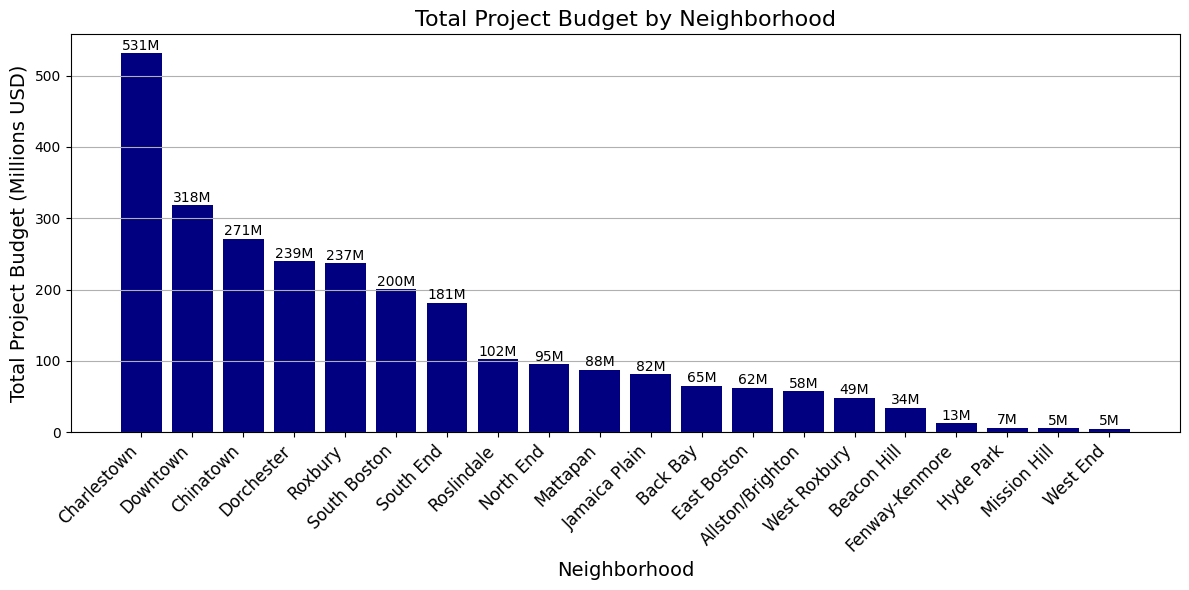

In [ ]:
import matplotlib.pyplot as plt

# Sort the neighborhoods based on total project budget in descending order
df_sorted = censusdf.sort_values(by='Total_Project_Budget', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Bar plot
plt.bar(df_sorted['Neighborhood'], df_sorted['Total_Project_Budget'] / 1_000_000, color='navy')

# Adding value labels on the bars
for i, value in enumerate(df_sorted['Total_Project_Budget']):
    plt.text(i, (value / 1_000_000) + 0.5, f'{int(round(value / 1_000_000))}M', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Total Project Budget (Millions USD)', fontsize=14)
plt.title('Total Project Budget by Neighborhood', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability

plt.grid(axis='y')

plt.tight_layout()
plt.show()


## Edit census CSV

In [ ]:
# Renaming neighborhoods
census['Neighborhood'] = census['Neighborhood'].replace({
    'Downtown': 'Downtown/Government Center',
    'Fenway': 'Fenway-Kenmore'
})

# Combining neighborhoods
combined_neighborhoods = {
    'Allston/Brighton': ['Allston', 'Brighton'],
    'Mission Hill': ['Longwood', 'Mission Hill'],
    'South Boston': ['South Boston', 'South Boston Waterfront']
}

for combined_name, neighborhoods in combined_neighborhoods.items():
    combined_data = census[census['Neighborhood'].isin(neighborhoods)]
    if 'Household Size' in combined_data.columns:
        combined_data['Household Size'] /= 2  # Divide Household Size by 2 for combined neighborhoods
    combined_data = combined_data.sum().to_frame().T
    combined_data['Neighborhood'] = combined_name
    census = census[~census['Neighborhood'].isin(neighborhoods)]
    census = pd.concat([census, combined_data], ignore_index=True)

# Summing desired columns for each neighborhood in df
df_sums = df.groupby('Neighborhood')[['Authorization_Existing', 'Authorization_FY', 'GO_Expended',
                                      'Capital_Year_0', 'CapitalYear_1', 'Capital_Year_25',
                                      'Total_Project_Budget']].sum().reset_index()

# Merge the summed columns into the census dataframe
merged_df = pd.merge(census, df_sums, how='left', on='Neighborhood')

# Copying over "Latitude" and "Longitude" columns from the df file
# Taking the first occurrence for each neighborhood
df_lat_long = df.groupby('Neighborhood')[['Latitude', 'Longitude']].first().reset_index()
merged_df = pd.merge(merged_df, df_lat_long, how='left', on='Neighborhood')

# Save the resulting dataframe to a CSV file
merged_df.to_csv("/content/drive/My Drive/WORK/SI_Budget_Report/Datasets/census.csv", index=False)

print("File 'census.csv' has been saved successfully.")


File 'census.csv' has been saved successfully.


<ipython-input-25-d8e82a815ea0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-25-d8e82a815ea0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Per capita spending (spending per citizen):

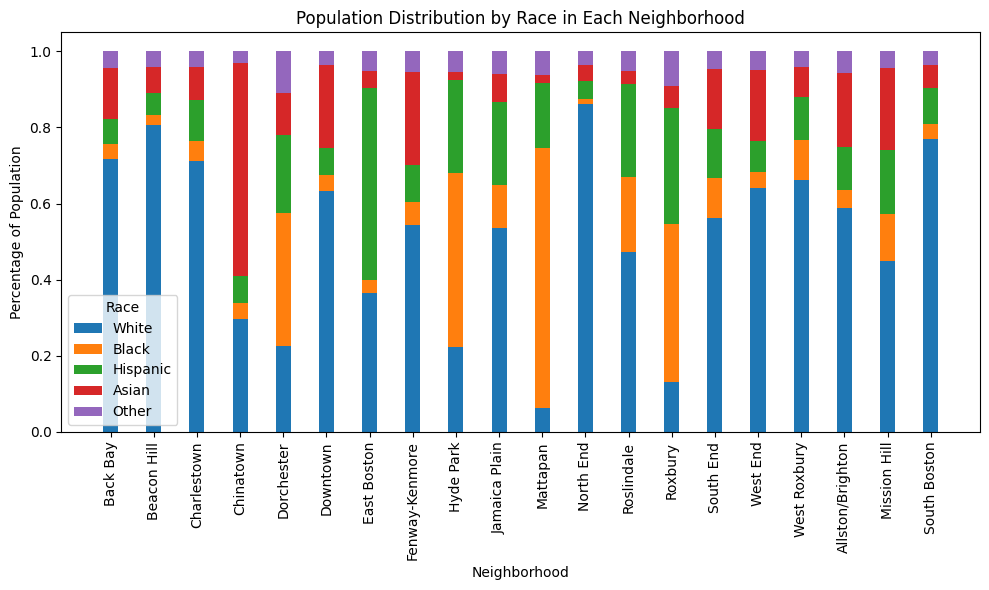

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate spending per capita
censusdf['Spending_Per_Capita'] = censusdf['Total'] / censusdf['Total'].sum()

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
bottom = None
for race in ['White', 'Black', 'Hispanic', 'Asian', 'Other']:
    plt.bar(censusdf['Neighborhood'], censusdf[race] / censusdf['Total'], label=race, width=bar_width, bottom=bottom)
    if bottom is None:
        bottom = censusdf[race] / censusdf['Total']
    else:
        bottom += censusdf[race] / censusdf['Total']

plt.xlabel('Neighborhood')
plt.ylabel('Percentage of Population')
plt.title('Population Distribution by Race in Each Neighborhood')
plt.xticks(rotation=90)
plt.legend(title='Race')
plt.tight_layout()
plt.show()


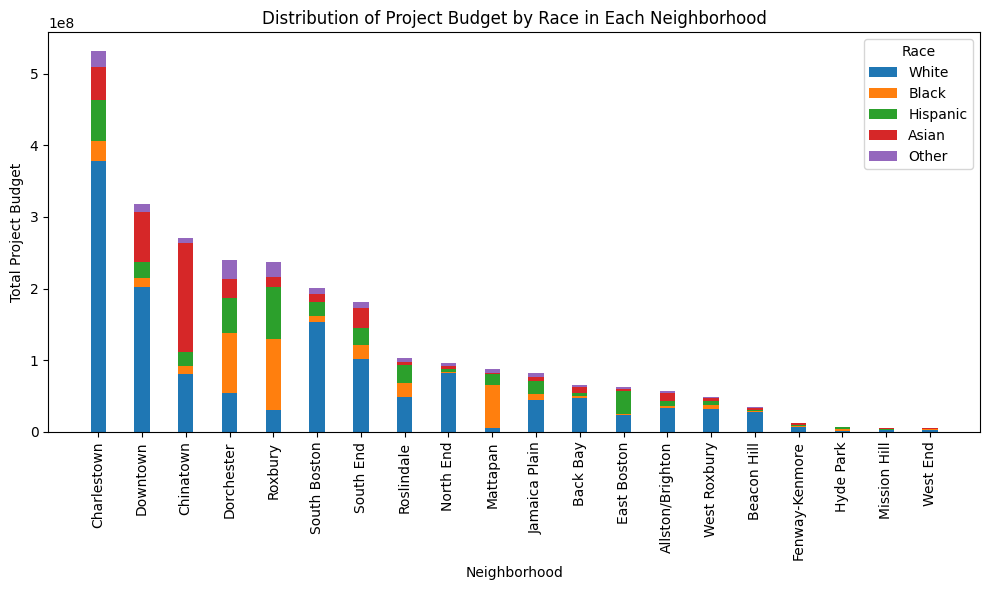

In [ ]:

# Sorting the DataFrame by the total project budget in descending order
df_sorted = censusdf.sort_values(by='Total_Project_Budget', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
bottom = None

for race in ['White', 'Black', 'Hispanic', 'Asian', 'Other']:
    plt.bar(df_sorted['Neighborhood'], df_sorted[race] / df_sorted['Total'] * df_sorted['Total_Project_Budget'], label=race, width=bar_width, bottom=bottom)
    if bottom is None:
        bottom = df_sorted[race] / df_sorted['Total'] * df_sorted['Total_Project_Budget']
    else:
        bottom += df_sorted[race] / df_sorted['Total'] * df_sorted['Total_Project_Budget']

plt.xlabel('Neighborhood')
plt.ylabel('Total Project Budget')
plt.title('Distribution of Project Budget by Race in Each Neighborhood')
plt.xticks(rotation=90)
plt.legend(title='Race')
plt.tight_layout()
plt.show()

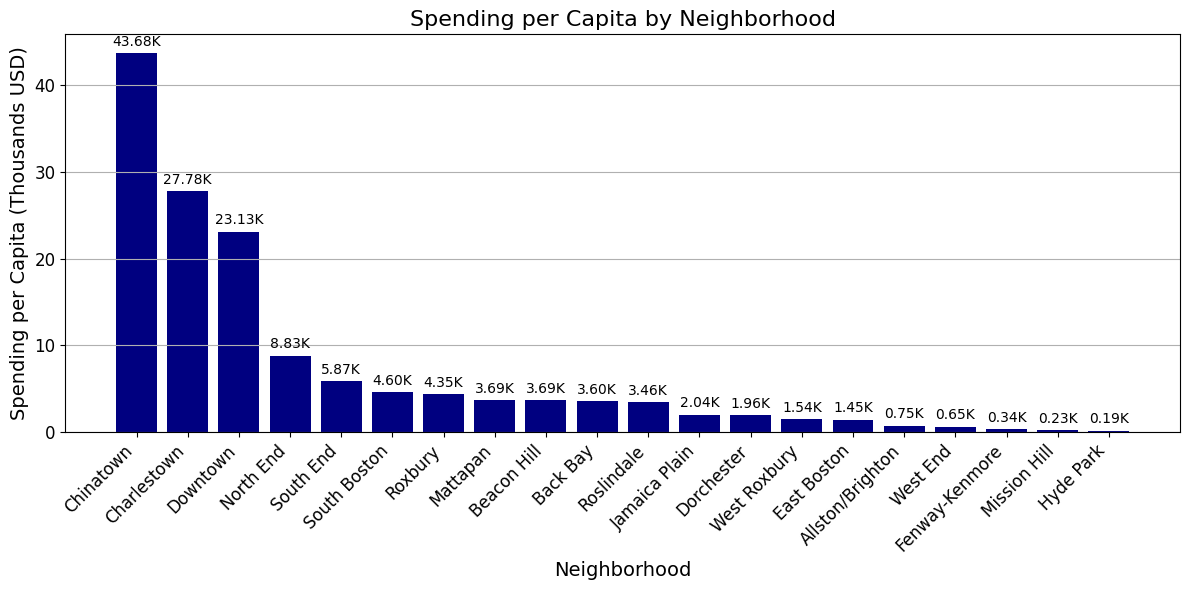

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate spending per capita
censusdf['Spending_Per_Capita'] = censusdf['Total_Project_Budget'] / censusdf['Total']

# Sort the DataFrame by spending per capita in descending order
sorted_neighborhoods = censusdf.sort_values(by='Spending_Per_Capita', ascending=False)

# Define the width of each bar
bar_width = 0.35

# Create an array of indices for the neighborhoods
indices = np.arange(len(sorted_neighborhoods))

# Create a figure and axes
plt.figure(figsize=(12, 6))

# Plotting spending per capita bars
plt.bar(sorted_neighborhoods['Neighborhood'], sorted_neighborhoods['Spending_Per_Capita'] / 1_000, color='navy')

# Adding value labels on the bars
for i, value in enumerate(sorted_neighborhoods['Spending_Per_Capita'] / 1_000):
    plt.text(i, value + 0.5, f'{value:.2f}K', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Spending per Capita (Thousands USD)', fontsize=14)
plt.title('Spending per Capita by Neighborhood', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y')

plt.tight_layout()
plt.show()


<ipython-input-33-92e336830ae0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


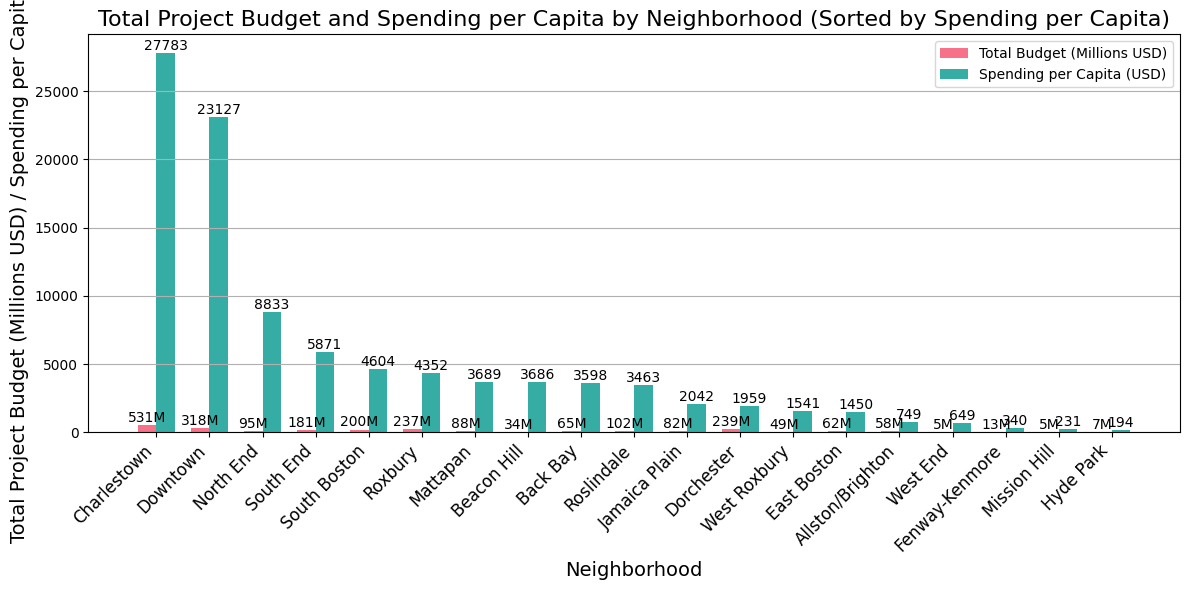

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exclude Chinatown
censusdf_filtered = censusdf[censusdf['Neighborhood'] != 'Chinatown']

# Calculate spending per capita
censusdf_filtered['Spending_Per_Capita'] = censusdf_filtered['Total_Project_Budget'] / censusdf_filtered['Total']

# Sort the neighborhoods based on spending per capita in descending order
sorted_neighborhoods = censusdf_filtered.sort_values(by='Spending_Per_Capita', ascending=False)

# Define the width of each bar
bar_width = 0.35

# Create an array of indices for the neighborhoods
indices = np.arange(len(sorted_neighborhoods))

# Define complementary colors
colors = sns.color_palette("husl", 2)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting total project budget bars
budget_bars = ax.bar(indices - bar_width/2, sorted_neighborhoods['Total_Project_Budget'] / 1_000_000, bar_width, label='Total Budget (Millions USD)', color=colors[0])

# Plotting spending per capita bars
per_capita_bars = ax.bar(indices + bar_width/2, sorted_neighborhoods['Spending_Per_Capita'], bar_width, label='Spending per Capita (USD)', color=colors[1])

# Adding value labels on the bars
for i, value in enumerate(sorted_neighborhoods['Total_Project_Budget']):
    ax.text(i - bar_width/2, (value / 1_000_000) + 0.5, f'{int(round(value / 1_000_000))}M', ha='center', va='bottom', fontsize=10)

for i, value in enumerate(sorted_neighborhoods['Spending_Per_Capita']):
    ax.text(i + bar_width/2, value + 0.5, f'{int(round(value))}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
ax.set_xlabel('Neighborhood', fontsize=14)
ax.set_ylabel('Total Project Budget (Millions USD) / Spending per Capita (USD)', fontsize=14)
ax.set_title('Total Project Budget and Spending per Capita by Neighborhood (Sorted by Spending per Capita)', fontsize=16)
ax.set_xticks(indices)
ax.set_xticklabels(sorted_neighborhoods['Neighborhood'], rotation=45, ha='right', fontsize=12)
ax.legend()

plt.grid(axis='y')

plt.tight_layout()
plt.show()


# Spending per SqMiles

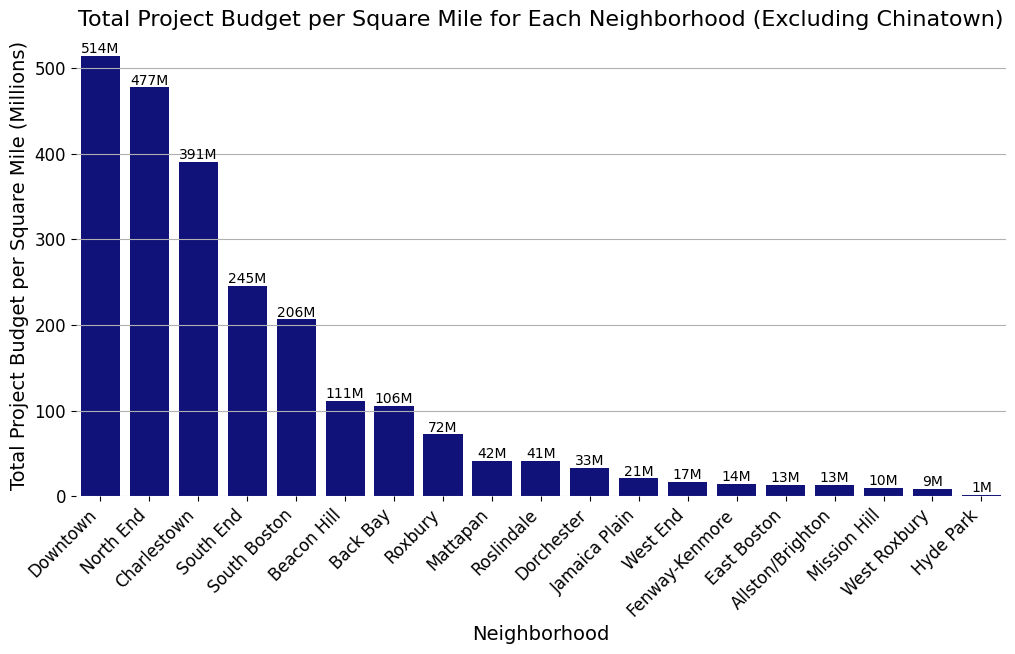

In [ ]:
# Calculate total project budget per square mile in millions
censusdf['Total_Project_Budget_Per_Sq_Mile'] = censusdf['Total_Project_Budget'] / censusdf['Sq_Miles'] / 1_000_000

# Filter out "Chinatown"
censusdf_filtered = censusdf[censusdf['Neighborhood'] != 'Chinatown']

# Sort the neighborhoods based on total project budget per square mile in descending order
df_sorted = censusdf_filtered.sort_values(by='Total_Project_Budget_Per_Sq_Mile', ascending=False)

# Create a horizontal barplot to visualize the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Neighborhood', y='Total_Project_Budget_Per_Sq_Mile', data=df_sorted, color='darkblue')
plt.ylabel('Total Project Budget per Square Mile (Millions)', fontsize=14)
plt.xlabel('Neighborhood', fontsize=14)
plt.title('Total Project Budget per Square Mile for Each Neighborhood (Excluding Chinatown)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Remove the axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(axis='y')

# Add text annotations to each bar
for p in ax.patches:
    ax.annotate(f'{int(round(p.get_height()))}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [ ]:
# Extract the list of neighborhoods and their total project budget per square mile in millions
neighborhoods_budget_per_sq_mile_millions = df_sorted[['Neighborhood', 'Total_Project_Budget_Per_Sq_Mile']]
neighborhoods_budget_per_sq_mile_millions['Total_Project_Budget_Per_Sq_Mile'] /= 1_000_000

# Display the list
print(neighborhoods_budget_per_sq_mile_millions)


        Neighborhood  Total_Project_Budget_Per_Sq_Mile
3          Chinatown                       2260.601433
5           Downtown                        513.572581
11         North End                        477.225000
2        Charlestown                        390.597346
14         South End                        245.178424
19      South Boston                        206.443263
1        Beacon Hill                        111.000000
0           Back Bay                        105.552095
13           Roxbury                         72.130190
10          Mattapan                         41.675355
12        Roslindale                         40.824701
4         Dorchester                         32.841048
9      Jamaica Plain                         20.736041
15          West End                         16.666667
7     Fenway-Kenmore                         14.488636
6        East Boston                         13.260699
17  Allston/Brighton                         12.974099
18      Mi

<ipython-input-8-25b4df1bd6b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


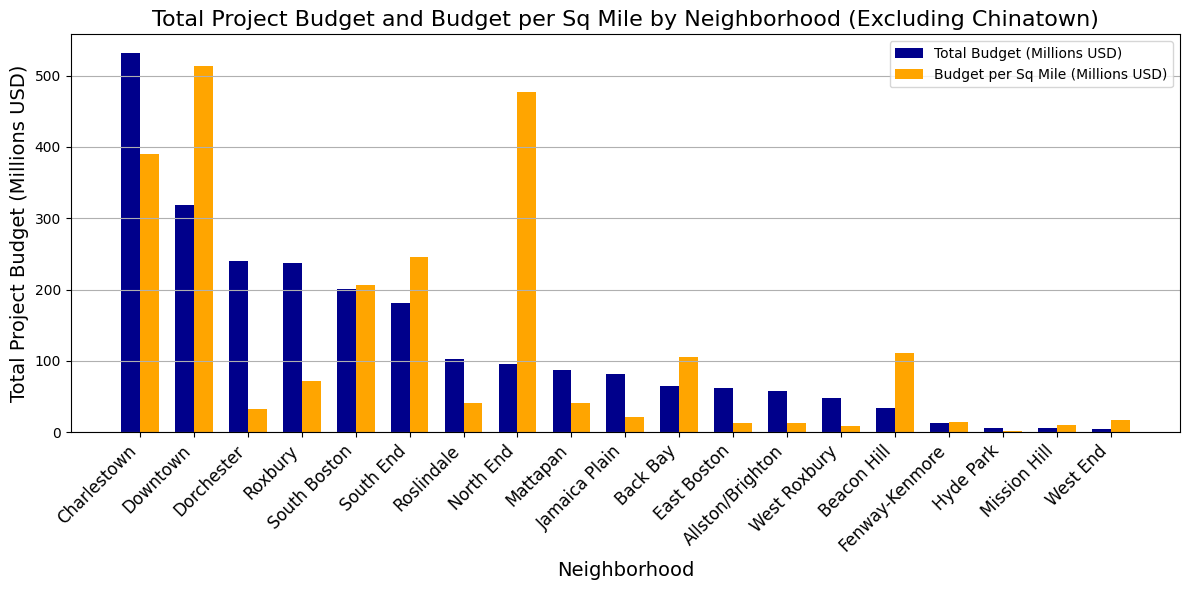

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exclude Chinatown
censusdf_filtered = censusdf[censusdf['Neighborhood'] != 'Chinatown']

# Sort the neighborhoods based on total project budget in descending order
sorted_neighborhoods = censusdf_filtered.sort_values(by='Total_Project_Budget', ascending=False)

# Define the width of each bar
bar_width = 0.35

# Create an array of indices for the neighborhoods
indices = np.arange(len(sorted_neighborhoods))

# Define complementary colors
colors = sns.color_palette("husl", 2)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting total project budget bars
budget_bars = ax.bar(indices - bar_width/2, sorted_neighborhoods['Total_Project_Budget'] / 1_000_000, bar_width, label='Total Budget (Millions USD)', color='darkblue')

# Plotting total project budget per square mile bars
per_sq_mile_bars = ax.bar(indices + bar_width/2, sorted_neighborhoods['Total_Project_Budget_Per_Sq_Mile'], bar_width, label='Budget per Sq Mile (Millions USD)', color='orange')

# Adding labels and title
ax.set_xlabel('Neighborhood', fontsize=14)
ax.set_ylabel('Total Project Budget (Millions USD)', fontsize=14)
ax.set_title('Total Project Budget and Budget per Sq Mile by Neighborhood (Excluding Chinatown)', fontsize=16)
ax.set_xticks(indices)
ax.set_xticklabels(sorted_neighborhoods['Neighborhood'], rotation=45, ha='right', fontsize=12)
ax.legend()

plt.grid(axis='y')

plt.tight_layout()
plt.show()


## Race and Budget


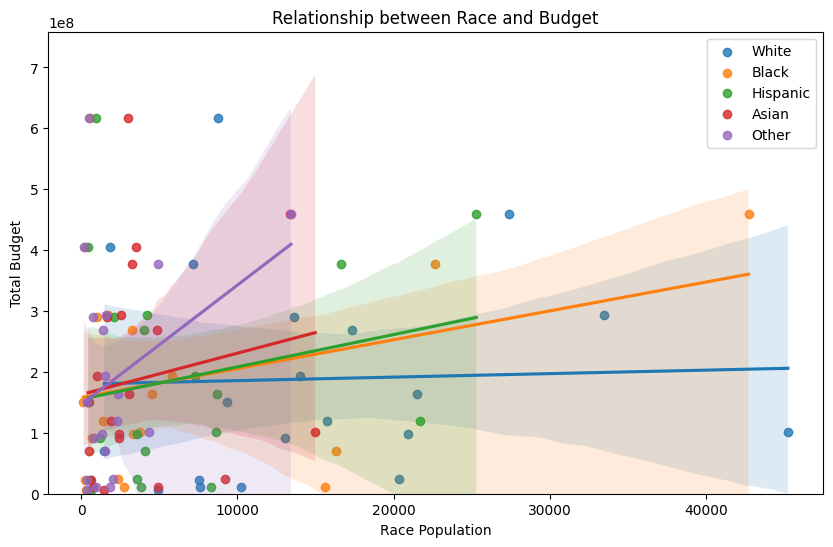

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total budget allocated for each race
censusdf['Total_Budget'] = censusdf['Authorization_Existing'] + censusdf['Authorization_FY'] + censusdf['GO_Expended'] + censusdf['Capital_Year_0'] + censusdf['CapitalYear_1'] + censusdf['Capital_Year_25']

# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(x='White', y='Total_Budget', data=df, label='White')
sns.regplot(x='Black', y='Total_Budget', data=df, label='Black')
sns.regplot(x='Hispanic', y='Total_Budget', data=df, label='Hispanic')
sns.regplot(x='Asian', y='Total_Budget', data=df, label='Asian')
sns.regplot(x='Other', y='Total_Budget', data=df, label='Other')
plt.xlabel('Race Population')
plt.ylabel('Total Budget')
plt.title('Relationship between Race and Budget')
plt.legend()

# Set y-axis limits to start from 0
plt.ylim(0)

plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Calculate total budget allocated for each race
censusdf['Total_Budget'] = censusdf['Authorization_Existing'] + censusdf['Authorization_FY'] + censusdf['GO_Expended'] + censusdf['Capital_Year_0'] + censusdf['CapitalYear_1'] + censusdf['Capital_Year_25']

# Define independent variables
X = censusdf[['White', 'Black', 'Hispanic', 'Asian', 'Other']]
X = sm.add_constant(X)  # Add a constant term to the independent variables

# Define dependent variable
y = censusdf['Total_Budget']

# Fit the model
model = sm.OLS(y, X).fit()

# Generate summary table
summary_table = model.summary()

# Convert summary table to DataFrame
summary_df = pd.read_html(summary_table.tables[1].as_html(), header=0, index_col=0)[0]

print(summary_df)


                  coef       std err      t  P>|t|      [0.025        0.975]
const     2.268000e+08  9.310000e+07  2.436  0.029  27100000.0  4.260000e+08
White    -4.209038e+03  6.553519e+03 -0.642  0.531    -18300.0  9.846862e+03
Black    -1.100000e+04  1.360000e+04 -0.808  0.433    -40200.0  1.820000e+04
Hispanic -7.261569e+03  1.120000e+04 -0.649  0.527    -31300.0  1.670000e+04
Asian    -1.211000e+04  2.130000e+04 -0.570  0.578    -57700.0  3.350000e+04
Other     8.759000e+04  7.070000e+04  1.239  0.236    -64000.0  2.390000e+05
